# Python Decorators

In Python, a decorator is a special kind of function that can be used to modify the behavior of another function. Decorators are indicated by the `@` symbol followed by the name of the decorator function, and they are placed immediately before the function that they modify.

In [1]:
# Example
class Test:
    
    @staticmethod
    def something():
        print("Hello")

### Implementation

In [8]:
def decorator(func): #<- function as argument
    # Inner function
    def wrapper():
        print("Before Function Call")
        print(func().upper()) #<- actual function call
        print("After Function Call")

    return wrapper #<- function as value

In [9]:
@decorator
def greet():
    return "Hello, World"

In [10]:
greet()

Before Function Call
HELLO, WORLD
After Function Call


Check email using decorator

In [24]:
def validate_email(func):
    def myinner(email):
        if email.endswith("@skill.com"):
            return func(email)
        else:
            print("Only supportes for skill")
    return myinner
        

In [27]:
import uuid

@validate_email
def get_code(email):
    return str(uuid.uuid1())

In [28]:
get_code("shailesh@skill.com")

'e98f6a95-dbb6-11f0-95ae-088fc3861ae5'

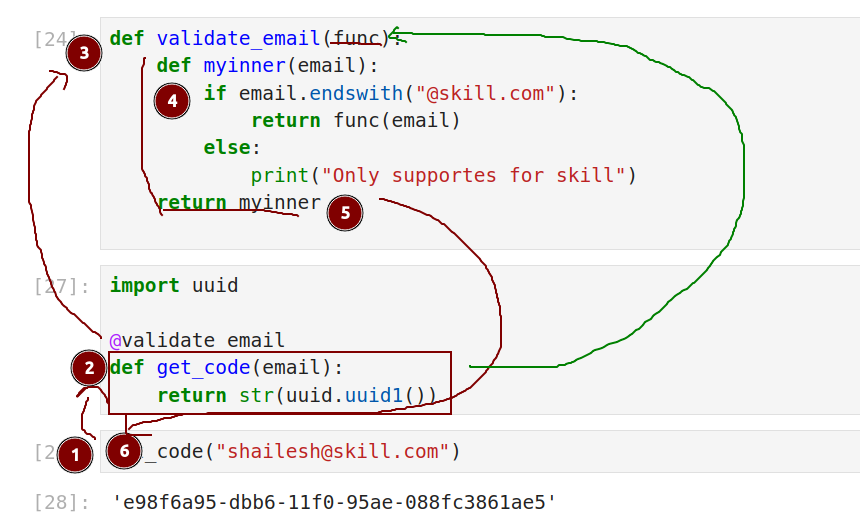

In [29]:
def star(func):
    def inner(*args, **kwargs):
        print("*" * 15)
        func(*args, **kwargs)
        print("*" * 15)
    return inner


def percent(func):
    def inner(*args, **kwargs):
        print("%" * 15)
        func(*args, **kwargs)
        print("%" * 15)
    return inner


@star
@percent
def printer(msg):
    print(msg)

printer("Hello")

***************
%%%%%%%%%%%%%%%
Hello
%%%%%%%%%%%%%%%
***************


## Decorator to find total time taken by function to run


In [59]:
import time
import random

def timeit(func):
    def wrapper(*args, **kwargs):
        
        start_time  = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        
        print("Total time taken:",round(end_time - start_time, 3), "secs")
        
        return result
    return wrapper

In [60]:
@timeit
def heavy_work():
    end_time = time.time() + random.uniform(1,10)

    result = 0
    while time.time() < end_time:
        result += random.randint(1, 100)

    return result

In [61]:
heavy_work()

Total time taken: 4.103 secs


823202770

In [63]:
@timeit
@star
@percent
def printer(msg):
    print(msg)

printer("Hello")

***************
%%%%%%%%%%%%%%%
Hello
%%%%%%%%%%%%%%%
***************
Total time taken: 0.0 secs
